In [1]:
import numpy as np
import math
import matplotlib.pylab as plt
# import pandas as pd

pi=math.acos(-1)

In [2]:
f = open("./LF11_o3l43.txt","r")
ff = np.loadtxt(f, dtype=float)
h = np.array(ff)

In [4]:
MJD = []
for x in range(len(h)):
    MJD.append(ff[x][0])
    
mag = []
for x in range(len(h)):
    mag.append(ff[x][1])

err = []
for x in range(len(h)):
    err.append(ff[x][2])

In [5]:
#### RANDOM FOURIER

P1=60
P2=300
dP=0.5

result= []
for _ in range(1000):

    randmag = ([np.random.normal(mag[j],err[j]) for j in range(len(mag))])
    #randmag = np.random.permutation(mag)
    temp = []
    
    o3l43 = [MJD,randmag]

    f = open('o3l43.txt', 'w')
    for x in o3l43:
        f.write(str(x) + "\n")
    f.close()

    Ptmp = []
    bins = np.linspace(60,1200,2281)
    for i in bins:
        Ptmp.append(i)

    N = len(mag)

    pw=[]
    for j in Ptmp:
        a=2.0*sum([x[1] * np.cos(2*pi/(j/60/24)*x[0]) for x in np.array(o3l43).T])/N
        b=2.0*sum([x[1] * np.sin(2*pi/(j/60/24)*x[0]) for x in np.array(o3l43).T])/N
        pw.append(a*a+b*b)

    for x in pw:
        temp.append(x)
    result.append(temp)

In [6]:
period = []
for x in range(1000):
    period.append(Ptmp[np.argmax(result[x])])

In [7]:
f = open('rand_period_o3l43.txt', 'w')
for x in period:
    f.write(str(x) + "\n")
f.close()

In [8]:
o43 = [MJD,mag]

f = open('o43.txt', 'w')
for x in o43:
    f.write(str(x) + "\n")

f.close()

In [9]:
### FOLDING CONTINOUS PERIODS - plot 2

Ptmp1 = range(60,1200)

Total = []
for i in Ptmp1:
    
    ph0=[x / (i/60/24) for x in MJD]
    ph=[x-math.floor(x) for x in ph0]
    #ph=phase(t,Ptmp)  ## temporal period
    #Extract points from phase 0.05 to 0.1
    bin_step=0.01
    bin_size=0.5
    #bin_num= np.linspace(0,1,21)
    bin_n=(1-bin_size)/bin_step+1
    ph1=[0+x*bin_step for x in range(int(bin_n))]
    #print(ph1)
    ph=np.array(ph)
    mag=np.array(mag)
    def Var_each_bin(x):
        index_bin = np.where((ph > x) & (ph < x+bin_size))
        ph_bin=ph[index_bin]
        mag_bin=mag[index_bin]
        var_bin=np.var(mag_bin)
        return (var_bin)
    var_all=[]
    for x in ph1:
        var_all.append(Var_each_bin(x))

    #return(sum(var_all))
    Total.append(np.nansum(var_all))

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3126: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\Admin\Anaconda3\lib\site-packages\numpy\core\_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\Admin\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [10]:
###FOURIER -- plot 3

P1=60
P2=300
dP=0.5
N=len(mag)

Ptmp = []
bins = np.linspace(60,1200,2281)
for i in bins:
    Ptmp.append(i)

# # N_Pbin=(P2-P1)/dP+1
# # Ptmp=[P1+x*dP for x in range(N_Pbin)]

pw=[]
for j in Ptmp:
    a=2.0*sum([x[1] * np.cos(2*pi/(j/60/24)*x[0]) for x in np.array(o43).T])/N
    b=2.0*sum([x[1] * np.sin(2*pi/(j/60/24)*x[0]) for x in np.array(o43).T])/N
    pw.append(a*a+b*b)

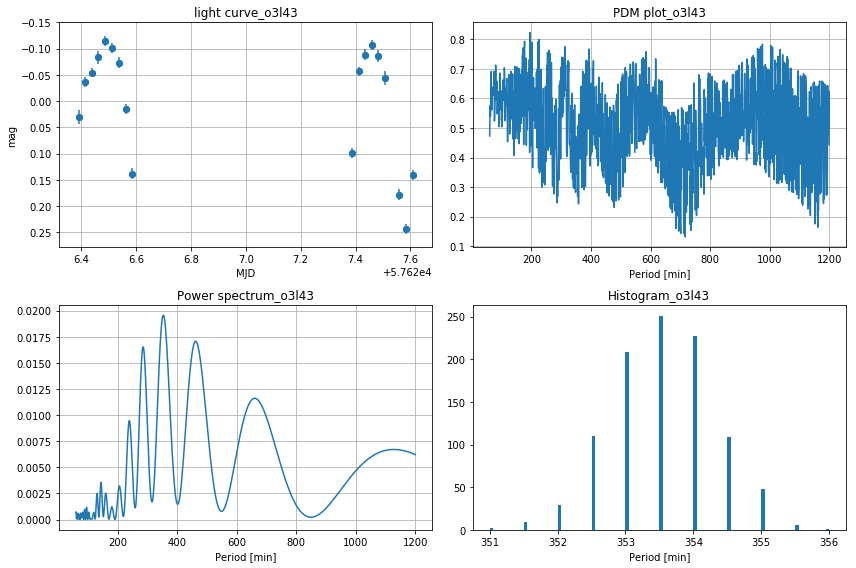

In [11]:
####PLOT 4 FIGURES

plt.figure(figsize=(12,8))

plt.subplot(221)
plt.scatter(MJD,mag)
plt.errorbar(MJD,mag,yerr=err,  fmt='o')
plt.gca().invert_yaxis()
plt.xlabel('MJD')
plt.ylabel('mag')
plt.title('light curve_o3l43')
plt.grid()

plt.subplot(222)
plt.plot(Ptmp1,Total)
plt.xlabel('Period [min]')
plt.title ('PDM plot_o3l43')
plt.grid()

plt.subplot(223)
plt.plot(Ptmp,pw)
plt.title ('Power spectrum_o3l43')
plt.xlabel('Period [min]')
plt.grid()

plt.subplot(224)
plt.hist(period, bins=100)
plt.xlabel('Period [min]')
plt.title('Histogram_o3l43')


plt.tight_layout()
plt.savefig('o3l43.jpg')
plt.show()

In [12]:
# idx = (np.array(period) < 200)
# idx3 = (np.array(period) >= 800)
# period2 = np.array(period)
# print('< 250 range:',np.mean(period2[idx]), np.median(period2[idx]), np.std(period2[idx]))
# print('200-400 range:',np.mean(period2[idx2]), np.median(period2[idx2]), np.std(period2[idx2]))
print(np.mean(period), np.median(period), np.std(period))

353.5285 353.5 0.760879589686


In [13]:
# n = np.linspace(60,100,81)
# for x in n:
#     print(period.count(x),x)

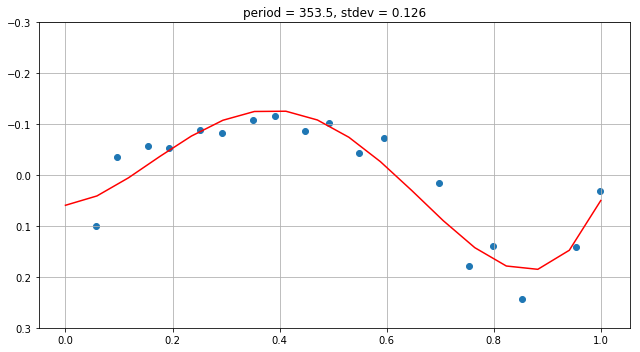

In [14]:
## FOLDING POSSIBLE PERIODS
import numpy.polynomial.polynomial as poly

def phase(MJD,Ptmp):
    ph0=[x / Ptmp for x in MJD]
    ph=[x-math.floor(x) for x in ph0]
    return ph

# Ptmp=353/60/24
# ph=phase(MJD,Ptmp)
# plt.subplot(311)
# plt.scatter(ph,mag)
# plt.title('period = 353')
# plt.grid()

Ptmp=353.5/60/24
ph=phase(MJD,Ptmp)

x_new = np.linspace(0,1,18)
coefs = poly.polyfit(ph, mag, 4)
ffit = poly.polyval(x_new, coefs)

plt.figure(figsize=(9,5))
# plt.subplot(312)
plt.scatter(ph,mag)
plt.plot(x_new, ffit, '-r')
plt.gca().invert_yaxis()
plt.title('period = 353.5, stdev = 0.126')
plt.grid()
plt.ylim(0.30,-0.30)

# Ptmp=354/60/24
# ph=phase(MJD,Ptmp)
# plt.subplot(313)
# plt.scatter(ph,mag)
# plt.title('period = 354')
# plt.grid()

plt.tight_layout()
plt.savefig('possible periods_o3l43-1.jpg')
plt.show()